Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

Data loading & understanding

In [ ]:
# read the csv data to a pandas dataframe
df = pd.read_csv('/content/train.csv')

Initial inspection

In [ ]:
df.shape

(800, 22)

In [ ]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [ ]:
#converting the datatype of age column from float to int
df['age'] = df['age'].astype(int)

In [ ]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


Finding the unique values in the columns of the dataset, expect for the id, age and result (as they seems to have unique values through the dataset)

In [ ]:
numerical_features = ('ID', 'age', 'result')
for col in df.columns:
  if col not in numerical_features:
    print(f'{col}: {df[col].unique()}')
    print('-'*50)

A1_Score: [1 0]
--------------------------------------------------
A2_Score: [0 1]
--------------------------------------------------
A3_Score: [1 0]
--------------------------------------------------
A4_Score: [0 1]
--------------------------------------------------
A5_Score: [1 0]
--------------------------------------------------
A6_Score: [0 1]
--------------------------------------------------
A7_Score: [1 0]
--------------------------------------------------
A8_Score: [0 1]
--------------------------------------------------
A9_Score: [1 0]
--------------------------------------------------
A10_Score: [1 0]
--------------------------------------------------
gender: ['f' 'm']
--------------------------------------------------
ethnicity: ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice: ['no' 'yes']
--------------------------------------------

In [ ]:
# droppping the id and age_desc columns as these featues does not contribute to our pridctive model
df = df.drop(columns = ['ID', 'age_desc'])

In [ ]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,?,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,?,no,no,South Africa,no,-4.777286,Self,0


Mapping the cities to the countries of they actually belong

In [ ]:
print(df['contry_of_res'].unique())

['Austria' 'India' 'United States' 'South Africa' 'Jordan'
 'United Kingdom' 'Brazil' 'New Zealand' 'Canada' 'Kazakhstan'
 'United Arab Emirates' 'Australia' 'Ukraine' 'Iraq' 'France' 'Malaysia'
 'Viet Nam' 'Egypt' 'Netherlands' 'Afghanistan' 'Oman' 'Italy'
 'AmericanSamoa' 'Bahamas' 'Saudi Arabia' 'Ireland' 'Aruba' 'Sri Lanka'
 'Russia' 'Bolivia' 'Azerbaijan' 'Armenia' 'Serbia' 'Ethiopia' 'Sweden'
 'Iceland' 'Hong Kong' 'Angola' 'China' 'Germany' 'Spain' 'Tonga'
 'Pakistan' 'Iran' 'Argentina' 'Japan' 'Mexico' 'Nicaragua' 'Sierra Leone'
 'Czech Republic' 'Niger' 'Romania' 'Cyprus' 'Belgium' 'Burundi'
 'Bangladesh']


In [ ]:
# mapping dictionary for country names
country_mapping = {
    'Viet Nam': 'Vietnam',
    'AmericanSamoa': 'United States',
    'Hong Kong': 'China'
}
df['contry_of_res'] = df['contry_of_res'].replace(country_mapping)


In [ ]:
print(df['contry_of_res'].unique())

['Austria' 'India' 'United States' 'South Africa' 'Jordan'
 'United Kingdom' 'Brazil' 'New Zealand' 'Canada' 'Kazakhstan'
 'United Arab Emirates' 'Australia' 'Ukraine' 'Iraq' 'France' 'Malaysia'
 'Vietnam' 'Egypt' 'Netherlands' 'Afghanistan' 'Oman' 'Italy' 'Bahamas'
 'Saudi Arabia' 'Ireland' 'Aruba' 'Sri Lanka' 'Russia' 'Bolivia'
 'Azerbaijan' 'Armenia' 'Serbia' 'Ethiopia' 'Sweden' 'Iceland' 'China'
 'Angola' 'Germany' 'Spain' 'Tonga' 'Pakistan' 'Iran' 'Argentina' 'Japan'
 'Mexico' 'Nicaragua' 'Sierra Leone' 'Czech Republic' 'Niger' 'Romania'
 'Cyprus' 'Belgium' 'Burundi' 'Bangladesh']


In [ ]:
# target class distribution
df['Class/ASD'].value_counts()

,count
Class/ASD,
0,639
1,161


Insights:
1. found that there are some missing values in ethnicity and relation column
2. age_desc has only one unique values, so removed from the final dataset for prediction
3. fixed the country names
4. identified the imbalance in the target class column

**Exploratory Data Analysis (EDA)**

In [ ]:
print(df.columns)

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')


In [ ]:
df.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0


In [ ]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


**Univariate Analysis**

Numerical values:
- age
- result

Distribution plots

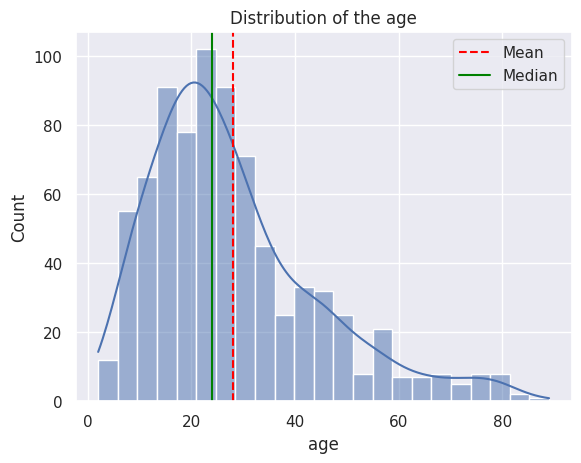

In [ ]:
sns.set_theme(style="darkgrid")
sns.histplot(df['age'], kde=True)
plt.title("Distribution of the age")

age_mean = df['age'].mean()
age_median = df['age'].median()

plt.axvline(age_mean, color='red', linestyle='--', label='Mean')
plt.axvline(age_median, color='green', linestyle='-', label='Median')

plt.legend()
plt.show()


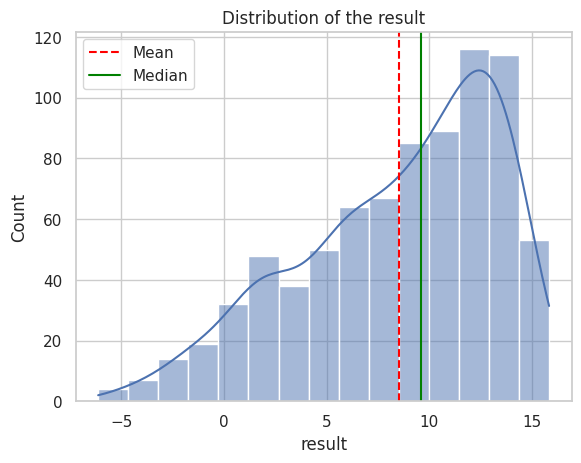

In [ ]:
sns.set_theme(style='whitegrid')
sns.histplot(df['result'], kde=True)
plt.title("Distribution of the result")

result_mean = df['result'].mean()
result_median = df['result'].median()

plt.axvline(result_mean, color='red', linestyle='--', label='Mean')
plt.axvline(result_median, color='green', linestyle='-', label='Median')

plt.legend()
plt.show()

Box plot for identifying the outliers in the numerical columns

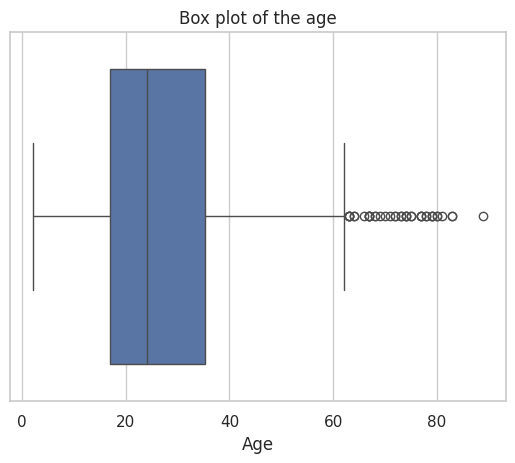

In [ ]:
sns.boxplot(x=df['age'])
plt.title('Box plot of the age')
plt.xlabel('Age')
plt.show()

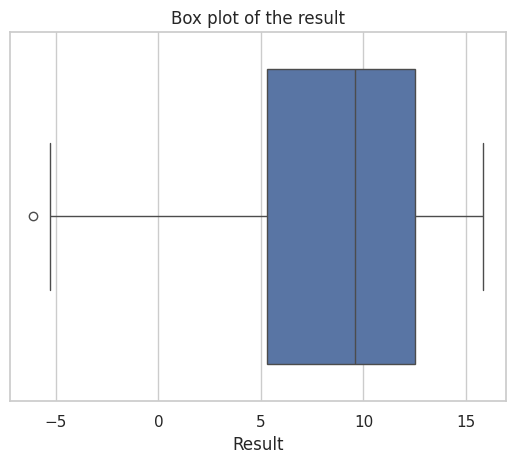

In [ ]:
sns.boxplot(x=df['result'])
plt.title('Box plot of the result')
plt.xlabel('Result')
plt.show()

In [ ]:
# count the outliers using IQR method
q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)
iqr = q3-q1

lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

age_outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]

In [ ]:
age_outliers

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
19,1,1,1,1,1,1,1,1,1,1,72,m,White-European,no,yes,United States,yes,12.286905,Self,1
31,0,1,0,0,0,0,0,1,0,0,74,f,Asian,no,no,Jordan,no,2.412387,Self,0
33,1,1,1,1,1,1,1,0,1,1,67,m,White-European,yes,no,New Zealand,no,11.647281,Self,0
41,1,1,1,1,1,0,1,1,1,1,74,m,White-European,no,no,United Kingdom,no,7.387992,Self,0
92,0,1,1,1,1,1,0,1,1,1,75,m,Latino,no,yes,United States,no,6.699799,Self,0
93,0,0,0,0,0,0,0,0,0,0,79,m,?,no,no,India,no,7.813125,Self,0
161,1,1,1,1,1,1,1,1,1,1,79,f,White-European,yes,yes,United States,no,10.482143,Self,0
231,1,1,1,1,1,1,1,1,1,1,69,f,White-European,no,no,United States,no,2.459004,Self,1
238,1,1,1,1,1,0,1,1,1,1,64,f,Latino,yes,no,Australia,no,13.756476,Self,1
241,0,0,0,0,0,0,0,0,1,0,64,f,others,no,no,Jordan,no,2.142376,Self,0


In [ ]:
len(age_outliers)

39

In [ ]:
# count the outliers using IQR method
q1 = df['result'].quantile(0.25)
q3 = df['result'].quantile(0.75)
iqr = q3-q1

lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

result_outliers = df[(df['result'] < lower_bound) | (df['result'] > upper_bound)]

In [ ]:
result_outliers

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
698,0,0,0,0,0,0,0,0,0,0,62,f,Asian,no,no,Jordan,no,-6.137748,Self,0


In [ ]:
len(result_outliers)

1

Univariate analysis for categorical features

In [ ]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

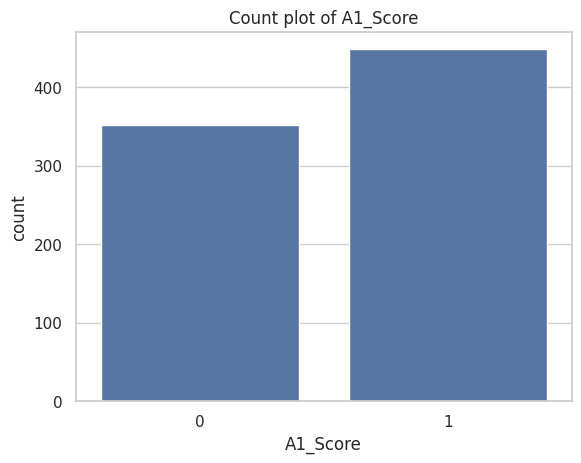

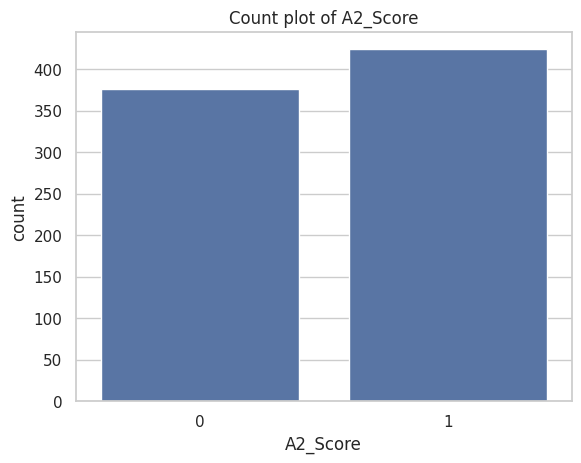

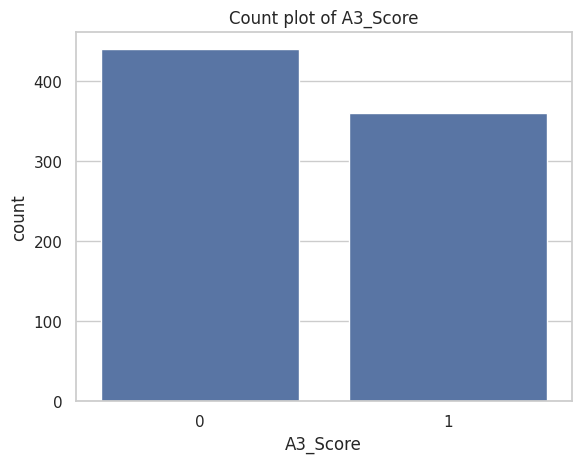

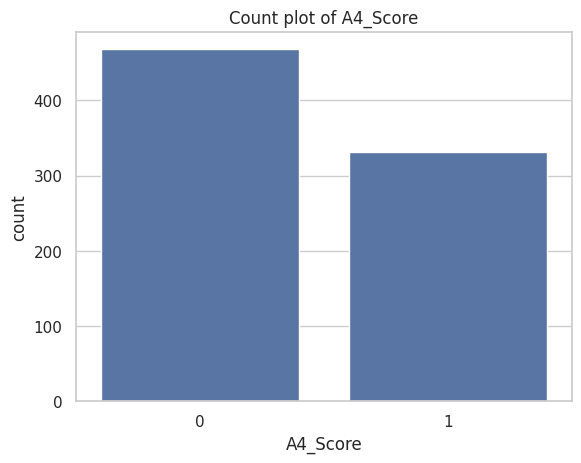

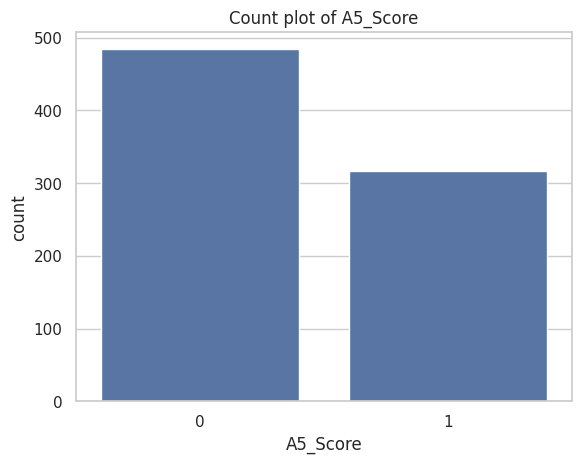

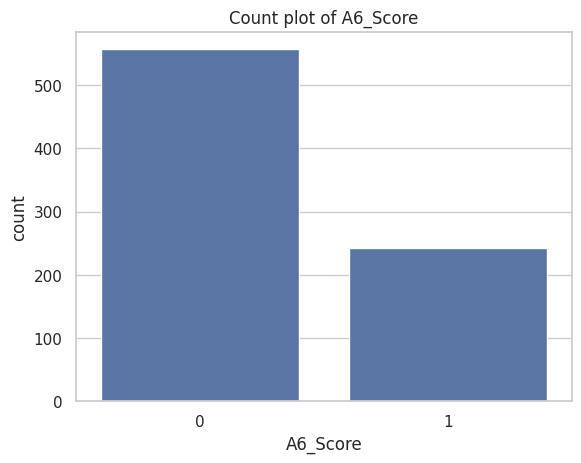

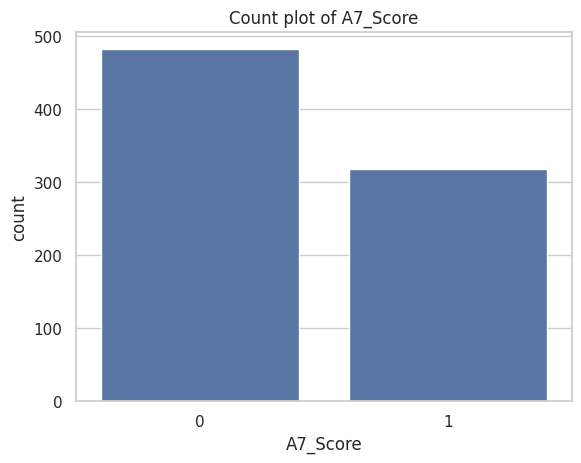

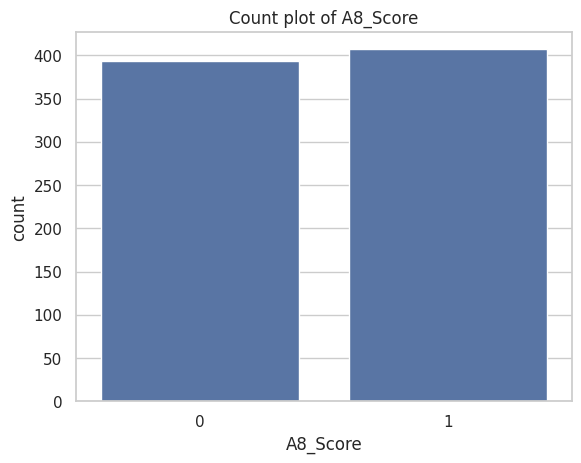

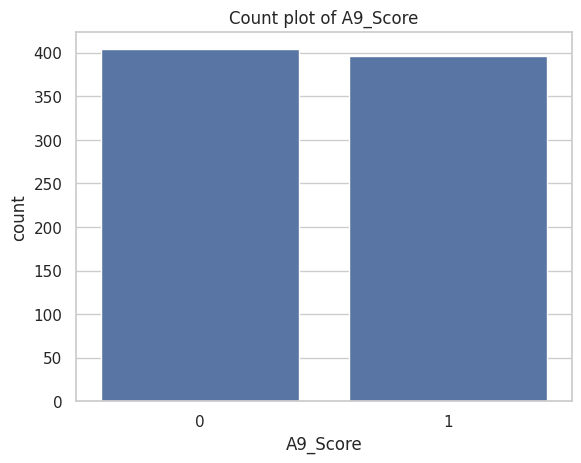

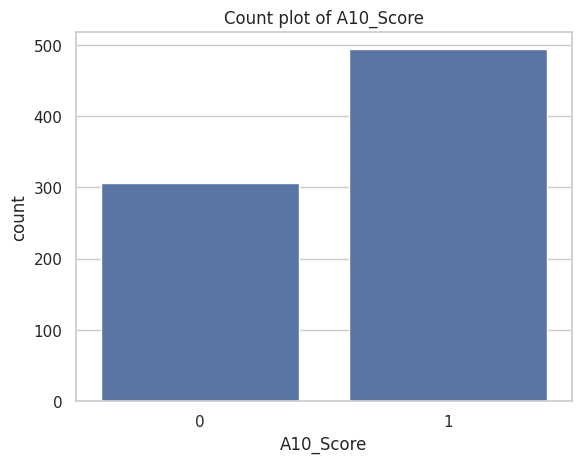

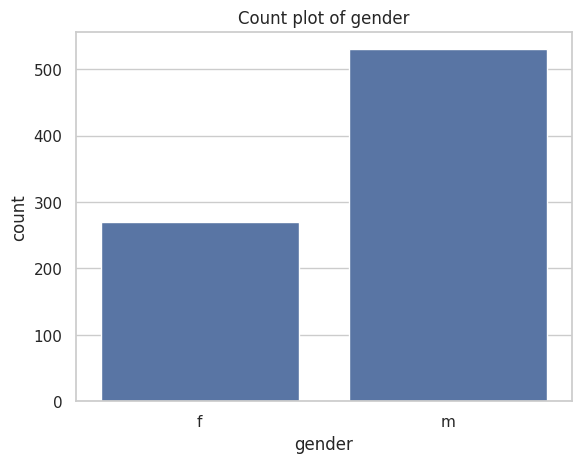

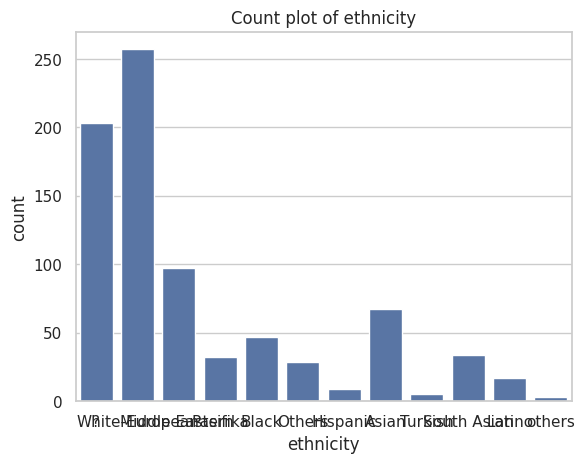

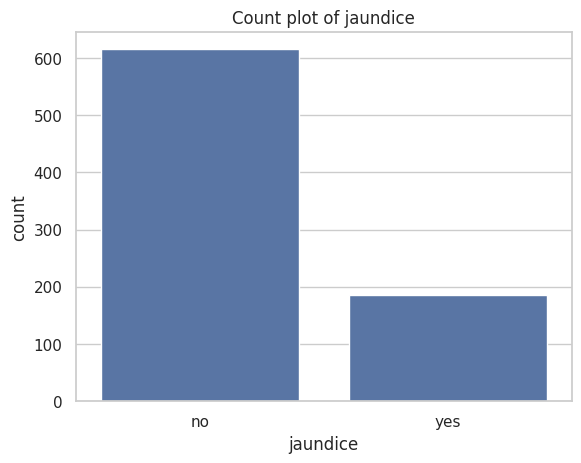

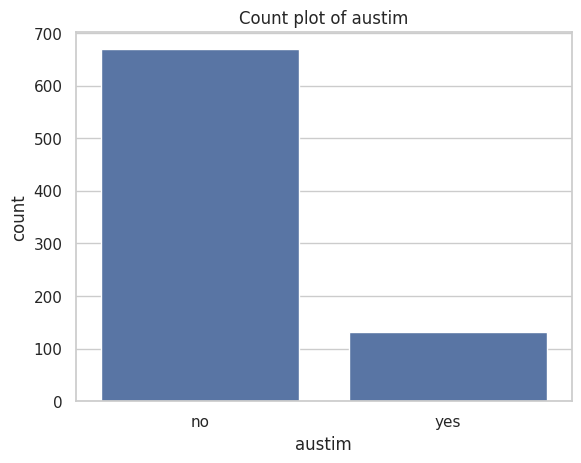

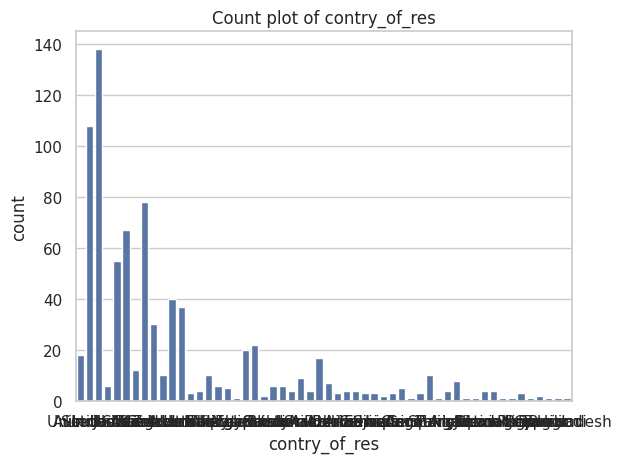

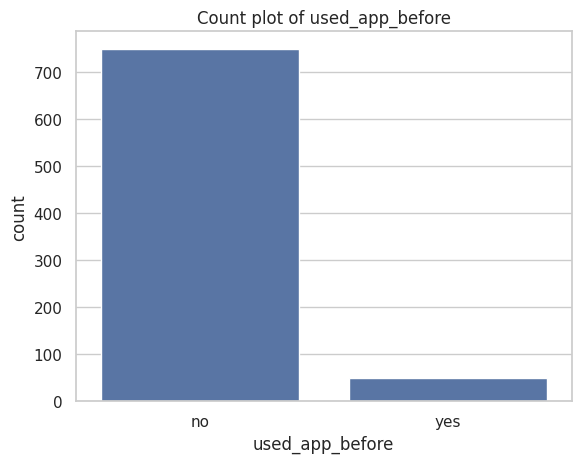

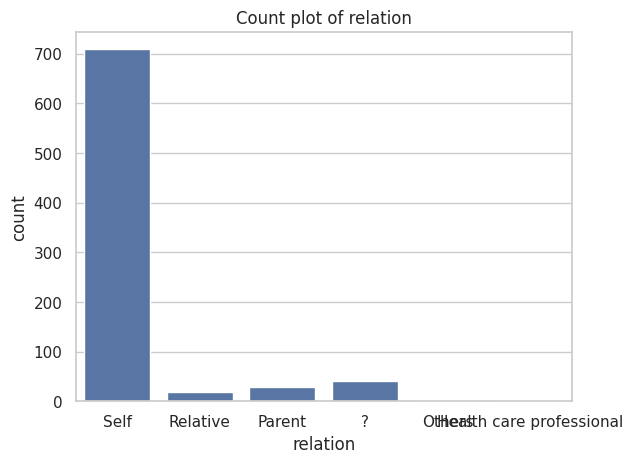

In [ ]:
categorical_cols = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'relation']
for col in categorical_cols:
  sns.countplot(x=df[col])
  plt.title(f'Count plot of {col}')
  plt.xlabel(col)
  plt.ylabel('count')
  plt.show()

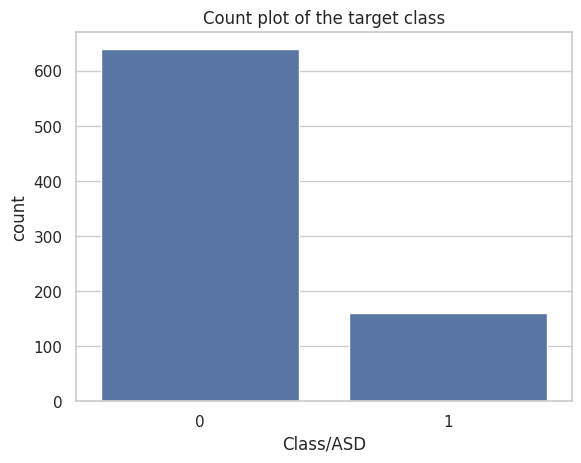

In [ ]:
# countplot for target column
sns.countplot(x=df['Class/ASD'])
plt.title('Count plot of the target class')
plt.xlabel('Class/ASD')
plt.ylabel('count')
plt.show()

Handle missing values in ethnicity and relation column

In [ ]:
df['ethnicity'].unique()

array(['?', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Others', 'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino',
       'others'], dtype=object)

In [ ]:
df['ethnicity'] = df['ethnicity'].replace({'?': 'Others'})

In [ ]:
df['relation'].unique()

array(['Self', 'Relative', 'Parent', '?', 'Others',
       'Health care professional'], dtype=object)

In [ ]:
df['relation'] = df['relation'].replace({'?': 'Others',
                                         'Relative': 'Others',
                                         'Parent': 'Others',
                                         'Health care professional': 'Others'})

In [ ]:
df['relation'].unique()

array(['Self', 'Others'], dtype=object)

In [ ]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,Others,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,Others,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,Others,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,Others,no,no,South Africa,no,-4.777286,Self,0


In [ ]:
df.tail()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
795,0,1,0,0,0,0,0,0,1,1,16,m,Hispanic,no,no,New Zealand,no,12.999501,Self,0
796,0,1,1,0,0,1,0,1,1,1,20,m,White-European,no,no,Cyprus,no,13.561518,Self,0
797,0,0,0,0,0,0,0,0,0,0,5,m,South Asian,yes,no,New Zealand,no,2.653177,Self,0
798,0,0,0,0,0,0,0,0,0,0,16,f,Others,no,no,Canada,no,9.069342,Self,0
799,0,1,0,0,0,0,0,0,0,0,46,f,Others,no,no,United Arab Emirates,yes,2.243304,Self,0


Label encoding for categorical data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         800 non-null    int64  
 1   A2_Score         800 non-null    int64  
 2   A3_Score         800 non-null    int64  
 3   A4_Score         800 non-null    int64  
 4   A5_Score         800 non-null    int64  
 5   A6_Score         800 non-null    int64  
 6   A7_Score         800 non-null    int64  
 7   A8_Score         800 non-null    int64  
 8   A9_Score         800 non-null    int64  
 9   A10_Score        800 non-null    int64  
 10  age              800 non-null    int64  
 11  gender           800 non-null    object 
 12  ethnicity        800 non-null    object 
 13  jaundice         800 non-null    object 
 14  austim           800 non-null    object 
 15  contry_of_res    800 non-null    object 
 16  used_app_before  800 non-null    object 
 17  result          

In [ ]:
# identify the columns with object datatype
object_cols = df.select_dtypes(include=['object']).columns

In [ ]:
print(object_cols)

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')


In [ ]:
# initialize a dictory to store encoders
encoders = {}

# apply the encoding and store the encoders
for col in object_cols:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])
  encoders[col] = le    # svaing this encoder for this column

# saving the encoders in a pickle file
with open('encoders.pkl', 'wb') as f:
  pickle.dump(encoders, f)

In [ ]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43,1,5,0,0,44,0,-4.777286,1,0


**Bivariate analysis**

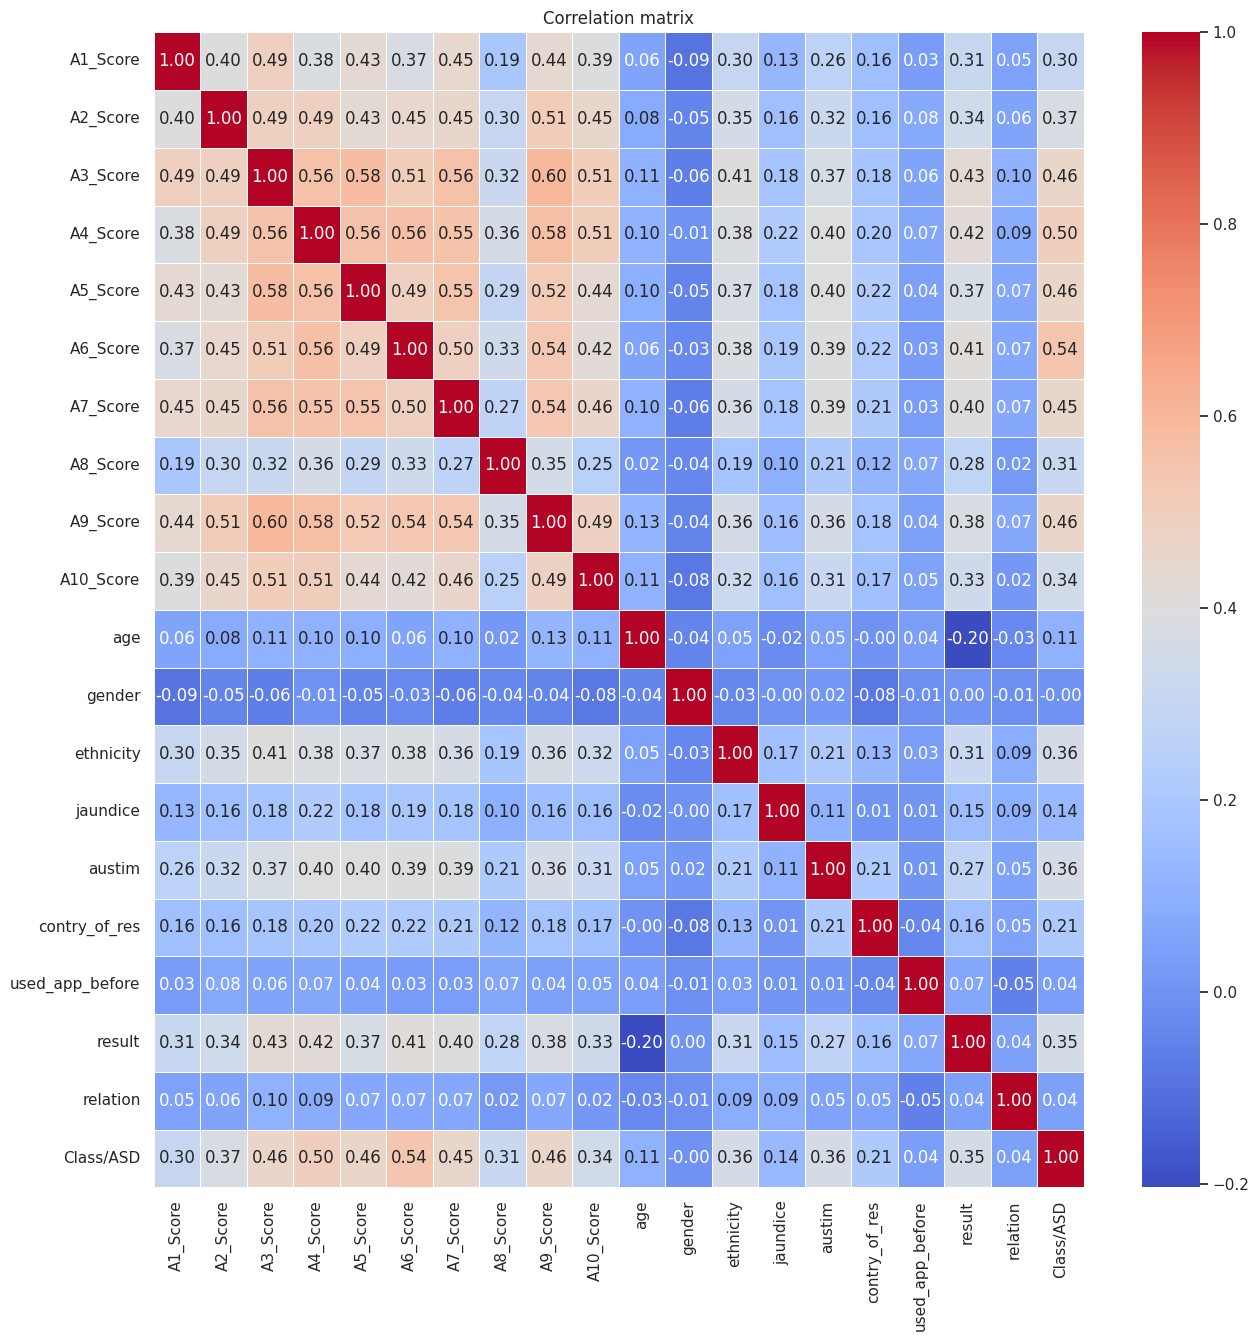

In [ ]:
# corelation matrix
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation matrix')
plt.show()

Insights from Exploratory Data Analysis

- there are few outliers in numerical columns like age, result
- there is a class imbalance in the target column
- there is no highly corelated column
- performed label encoding and stored in a pickle file

**Data preprocessing**

Handling the outliers

In [ ]:
# definging function to replace the outliers with median value
def replace_outliers_with_median(df, column):
  q1 = df['age'].quantile(0.25)
  q3 = df['age'].quantile(0.75)
  iqr = q3-q1

  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr

  median = df[column].median()

  #replace outliers with median values
  df[column] = df[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

  return df

In [ ]:
#replacing the outliers in age, result column
df = replace_outliers_with_median(df, 'age')
df = replace_outliers_with_median(df, 'result')

In [ ]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.0,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47.0,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7.0,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23.0,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43.0,1,5,0,0,44,0,-4.777286,1,0


**Train Test Split**

In [ ]:
X = df.drop(columns='Class/ASD')
y = df['Class/ASD']

In [ ]:
X.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation
0,1,0,1,0,1,0,1,0,1,1,38.0,0,5,0,0,6,0,6.351166,1
1,0,0,0,0,0,0,0,0,0,0,47.0,1,5,0,0,23,0,2.255185,1
2,1,1,1,1,1,1,1,1,1,1,7.0,1,9,0,1,52,0,14.851484,1
3,0,0,0,0,0,0,0,0,0,0,23.0,0,5,0,0,52,0,2.276617,1
4,0,0,0,0,0,0,0,0,0,0,43.0,1,5,0,0,44,0,-4.777286,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
y_train.shape

(640,)

In [ ]:
y_test.shape

(160,)

In [ ]:
print(y_train.value_counts())
print(y_test.value_counts())

Class/ASD
0    514
1    126
Name: count, dtype: int64
Class/ASD
0    125
1     35
Name: count, dtype: int64


*SMOTE (Synthetic Minority Oversampling Technique)*

In [ ]:
smote = SMOTE(random_state=42)

In [ ]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
y_train_smote.shape

(1028,)

In [ ]:
y_train_smote.value_counts()

,count
Class/ASD,
0,514
1,514


**Model Training using cross validation technique**

In [ ]:
# list of classifiers
models = {
    'decision tree': DecisionTreeClassifier(random_state=42),
    'random forest': RandomForestClassifier(random_state=42),
    'xgboost': XGBClassifier(random_state=42)
}

In [ ]:
# dictionary to store the cross validation results
cv_scores = dict()

# perform 5 fold cross validation for each model
for model_name, model in models.items():
  print(f'Training model: {model_name} with default parameters')
  scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring='accuracy')
  cv_scores[model_name] = scores
  print(f'{model_name} cross validation scores: {scores}')
  print(f'{model_name} cross validation mean score: {scores.mean():.2f}')
  print('-'*50)

Training model: decision tree with default parameters
decision tree cross validation scores: [0.82524272 0.83980583 0.88349515 0.82926829 0.85365854]
decision tree cross validation mean score: 0.85
--------------------------------------------------
Training model: random forest with default parameters
random forest cross validation scores: [0.90291262 0.88834951 0.9223301  0.93658537 0.91707317]
random forest cross validation mean score: 0.91
--------------------------------------------------
Training model: xgboost with default parameters
xgboost cross validation scores: [0.86407767 0.89320388 0.91262136 0.90243902 0.90243902]
xgboost cross validation mean score: 0.89
--------------------------------------------------


**Model Selection and Hyperparameter tuning**

In [ ]:
# initializing models
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
xgboost_classifier = XGBClassifier(random_state=42)

In [ ]:
# hyperparameter grids for RandomizedSearchCV

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 50, 70],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3]
}

param_grid_rf = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3],
    'bootstrap': [True, False]
}

param_grid_xgboost = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0]
}


In [ ]:
# hyperparameter tuning for three tree based models

# perform a RandomizedSearchCV for each model
random_search_dt = RandomizedSearchCV(estimator=dt, param_distributions=param_grid_dt, n_iter=20, cv=5, scoring='accuracy', random_state=42)
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_grid_rf, n_iter=20, cv=5, scoring='accuracy', random_state=42)
random_search_xgboost = RandomizedSearchCV(estimator=xgboost_classifier, param_distributions=param_grid_xgboost, n_iter=20, cv=5, scoring='accuracy', random_state=42)

In [ ]:
# fit the models with training dataset
random_search_dt.fit(X_train_smote, y_train_smote)
random_search_rf.fit(X_train_smote, y_train_smote)
random_search_xgboost.fit(X_train_smote, y_train_smote)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=42, scoring='accuracy')

In [ ]:
print(random_search_dt.best_estimator_)
print(random_search_dt.best_score_)

print(random_search_rf.best_estimator_)
print(random_search_rf.best_score_)

print(random_search_xgboost.best_estimator_)
print(random_search_xgboost.best_score_)

DecisionTreeClassifier(max_depth=70, random_state=42)
0.8462941037177363
RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=50,
                       random_state=42)
0.9192943405162207
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)
0.8988491593653801


In [ ]:
# get the model with the best score
best_model = None
best_score = 0

if random_search_dt.best_score_ > best_score:
  best_score = random_search_dt.best_score_
  best_model = random_search_dt.best_estimator_

if random_search_rf.best_score_ > best_score:
  best_score = random_search_rf.best_score_
  best_model = random_search_rf.best_estimator_

if random_search_xgboost.best_score_ > best_score:
  best_score = random_search_xgboost.best_score_
  best_model = random_search_xgboost.best_estimator_

In [ ]:
print("Best model:", best_model)
print(f"Best cv score: {best_score:.2f}")

Best model: RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=50,
                       random_state=42)
Best cv score: 0.92


In [ ]:
# save the best model
with open('best_model.pkl', 'wb') as f:
  pickle.dump(best_model, f)

**Model evaluation**

In [ ]:
# evaluate on the test data
y_test_pred = best_model.predict(X_test)

print("Accuracy score:\n",accuracy_score(y_test, y_test_pred))
print("Confusion matrix:\n",confusion_matrix(y_test, y_test_pred))
print("Classification report:\n",classification_report(y_test, y_test_pred))

Accuracy score:
 0.85625
Confusion matrix:
 [[115  10]
 [ 13  22]]
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       125
           1       0.69      0.63      0.66        35

    accuracy                           0.86       160
   macro avg       0.79      0.77      0.78       160
weighted avg       0.85      0.86      0.85       160

